In [1]:
import numpy as np
import os
import string
import matplotlib.pyplot as plt

In [2]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
plt.rcParams["figure.figsize"] = cm2inch(16,10)
plt.rcParams.update({'font.size':8})
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [3]:
systems = ['IA','PA', 'FA_G-prot','FA_no_G-prot']
begin_time_ps=["15000000","15000000","15000000","15000000"]
end_time_ps=["-1","-1","-1","-1"]

In [4]:
lipid_dir = {"FA_G-prot":"POPC, POPS, POPA, POPG, POPE, CHOL, DPGM3, DPSM, PAP6",
            "FA_no_G-prot":"POPC, POPS, POPA, POPG, POPE, CHOL, DPGM3, DPSM, PAP6",
            "IA":"POPC, POPS, POPA, POPG, POPE, CHOL, DPGM3, DPSM, PAP6",
            "PA":"POPC, POPS, POPA, POPG, POPE, CHOL, DPGM3, DPSM, PAP6"}

In [5]:
#ndx_cmd= "for i in `ls GRO/*[0-3].gro`; do base=`basename $i .gro`; ./Make_ndx_rdf.py -n ${base}; done"
#os.system(ndx_cmd)

### Calculating RDF for all the lipids in the different systems

#### only using the entire trajectory

In [6]:
for idx, s in enumerate(systems):
    for r in range(3): 
        print ("Replica", r)
        tpr = "GRO/{0:s}_{1:d}_nowat.gro".format(s,r)
        ndx = "NDX/{0:s}_{1:d}_nowat_rdf.ndx".format(s,r)
        xtc = "XTC/{0:s}_{1:d}_nowat_res_center.xtc".format(s,r)
        b = begin_time_ps[idx]
        e = end_time_ps[idx]
        lipids = lipid_dir[s]
        sel = [ "{0:s}".format(l) for l in lipids.split(',') ]
        output_base = "RDF/{0:s}_{1:d}_nowat".format(s,r)
        
        for sele in sel:
            #print ("lipid {0:s}".format(sele))
            output_xvg = output_base+"_{0:s}_rdf.xvg".format(sele.split('&')[0]).translate({ord(c): None for c in string.whitespace})
            if os.path.exists(output_xvg):
                print ("{0:s} exists".format(output_xvg))
                continue
            else:
                lipid_sel = sele.translate({ord(c): None for c in string.whitespace})
                print ('lipid selection', lipid_sel)
                rdf_cmd = "gmx_s rdf -f {0:s} -s {1:s} -n {2:s} -o {3:s} -dt 1000 -ref Protein -sel {4:s}".format(xtc, tpr, ndx, output_xvg, lipid_sel)
                #rdf_cmd = "gmx rdf -f {0:s} -s {1:s} -n {2:s} -o {3:s} -dt 10 -ref Protein -sel {4:s} -b {5:s} -e {6:s}".format(xtc, tpr, ndx, output_xvg, lipid_sel, b, e)
                print (rdf_cmd)
                os.system(rdf_cmd)

Replica 0
RDF/IA_0_nowat_POPC_rdf.xvg exists
RDF/IA_0_nowat_POPS_rdf.xvg exists
RDF/IA_0_nowat_POPA_rdf.xvg exists
RDF/IA_0_nowat_POPG_rdf.xvg exists
RDF/IA_0_nowat_POPE_rdf.xvg exists
RDF/IA_0_nowat_CHOL_rdf.xvg exists
RDF/IA_0_nowat_DPGM3_rdf.xvg exists
RDF/IA_0_nowat_DPSM_rdf.xvg exists
RDF/IA_0_nowat_PAP6_rdf.xvg exists
Replica 1
RDF/IA_1_nowat_POPC_rdf.xvg exists
RDF/IA_1_nowat_POPS_rdf.xvg exists
RDF/IA_1_nowat_POPA_rdf.xvg exists
RDF/IA_1_nowat_POPG_rdf.xvg exists
RDF/IA_1_nowat_POPE_rdf.xvg exists
RDF/IA_1_nowat_CHOL_rdf.xvg exists
RDF/IA_1_nowat_DPGM3_rdf.xvg exists
RDF/IA_1_nowat_DPSM_rdf.xvg exists
RDF/IA_1_nowat_PAP6_rdf.xvg exists
Replica 2
RDF/IA_2_nowat_POPC_rdf.xvg exists
RDF/IA_2_nowat_POPS_rdf.xvg exists
RDF/IA_2_nowat_POPA_rdf.xvg exists
RDF/IA_2_nowat_POPG_rdf.xvg exists
RDF/IA_2_nowat_POPE_rdf.xvg exists
RDF/IA_2_nowat_CHOL_rdf.xvg exists
RDF/IA_2_nowat_DPGM3_rdf.xvg exists
RDF/IA_2_nowat_DPSM_rdf.xvg exists
RDF/IA_2_nowat_PAP6_rdf.xvg exists
Replica 0
RDF/PA_0_now

#### only using the last 5 µs

In [7]:
for idx, s in enumerate(systems):
    for r in range(3): 
        print ("Replica", r)
        tpr = "GRO/{0:s}_{1:d}_nowat.gro".format(s,r)
        ndx = "NDX/{0:s}_{1:d}_nowat_rdf.ndx".format(s,r)
        xtc = "XTC/{0:s}_{1:d}_nowat_res_center_fit_last5.xtc".format(s,r)
        b = begin_time_ps[idx]
        e = end_time_ps[idx]
        lipids = lipid_dir[s]
        sel = [ "{0:s}".format(l) for l in lipids.split(',') ]
        output_base = "RDF/{0:s}_{1:d}_nowat".format(s,r)
        
        for sele in sel:
            #print ("lipid {0:s}".format(sele))
            output_xvg = output_base+"_{0:s}_last5_rdf.xvg".format(sele.split('&')[0]).translate({ord(c): None for c in string.whitespace})
            if os.path.exists(output_xvg):
                print ("{0:s} exists".format(output_xvg))
                continue
            else:
                lipid_sel = sele.translate({ord(c): None for c in string.whitespace})
                print ('lipid selection', lipid_sel)
                rdf_cmd = "gmx_s rdf -f {0:s} -s {1:s} -n {2:s} -o {3:s} -dt 1000 -ref Protein -sel {4:s}".format(xtc, tpr, ndx, output_xvg, lipid_sel)
                #rdf_cmd = "gmx rdf -f {0:s} -s {1:s} -n {2:s} -o {3:s} -dt 10 -ref Protein -sel {4:s} -b {5:s} -e {6:s}".format(xtc, tpr, ndx, output_xvg, lipid_sel, b, e)
                print (rdf_cmd)
                os.system(rdf_cmd)

Replica 0
RDF/IA_0_nowat_POPC_last5_rdf.xvg exists
RDF/IA_0_nowat_POPS_last5_rdf.xvg exists
RDF/IA_0_nowat_POPA_last5_rdf.xvg exists
RDF/IA_0_nowat_POPG_last5_rdf.xvg exists
RDF/IA_0_nowat_POPE_last5_rdf.xvg exists
RDF/IA_0_nowat_CHOL_last5_rdf.xvg exists
RDF/IA_0_nowat_DPGM3_last5_rdf.xvg exists
RDF/IA_0_nowat_DPSM_last5_rdf.xvg exists
RDF/IA_0_nowat_PAP6_last5_rdf.xvg exists
Replica 1
RDF/IA_1_nowat_POPC_last5_rdf.xvg exists
RDF/IA_1_nowat_POPS_last5_rdf.xvg exists
RDF/IA_1_nowat_POPA_last5_rdf.xvg exists
RDF/IA_1_nowat_POPG_last5_rdf.xvg exists
RDF/IA_1_nowat_POPE_last5_rdf.xvg exists
RDF/IA_1_nowat_CHOL_last5_rdf.xvg exists
RDF/IA_1_nowat_DPGM3_last5_rdf.xvg exists
RDF/IA_1_nowat_DPSM_last5_rdf.xvg exists
RDF/IA_1_nowat_PAP6_last5_rdf.xvg exists
Replica 2
RDF/IA_2_nowat_POPC_last5_rdf.xvg exists
RDF/IA_2_nowat_POPS_last5_rdf.xvg exists
RDF/IA_2_nowat_POPA_last5_rdf.xvg exists
RDF/IA_2_nowat_POPG_last5_rdf.xvg exists
RDF/IA_2_nowat_POPE_last5_rdf.xvg exists
RDF/IA_2_nowat_CHOL_last5

#### only using the last 10 µs

In [ ]:
for idx, s in enumerate(systems):
    for r in range(3): 
        print ("Replica", r)
        tpr = "GRO/{0:s}_{1:d}_nowat.gro".format(s,r)
        ndx = "NDX/{0:s}_{1:d}_nowat_rdf_chains.ndx".format(s,r)
        xtc = "XTC/{0:s}_{1:d}_nowat_res_center_fit_last10ms.xtc".format(s,r)
        b = begin_time_ps[idx]
        e = end_time_ps[idx]
        lipids = lipid_dir[s]
        sel = [ "{0:s}".format(l) for l in lipids.split(',') ]
        output_base = "RDF/{0:s}_{1:d}_nowat".format(s,r)
        
        for sele in sel:
            #print ("lipid {0:s}".format(sele))
            output_xvg = output_base+"_{0:s}_last10_GCGR_rdf.xvg".format(sele.split('&')[0]).translate({ord(c): None for c in string.whitespace})
            if os.path.exists(output_xvg):
                print ("{0:s} exists".format(output_xvg))
                continue
            else:
                lipid_sel = sele.translate({ord(c): None for c in string.whitespace})
                print ('lipid selection', lipid_sel)
                rdf_cmd = "gmx_s rdf -f {0:s} -s {1:s} -n {2:s} -o {3:s} -dt 100 -ref GCGR -sel {4:s}".format(xtc, tpr, ndx, output_xvg, lipid_sel)
                print (rdf_cmd)
                os.system(rdf_cmd)

Replica 0
lipid selection POPC
gmx_s rdf -f XTC/IA_0_nowat_res_center_fit_last10ms.xtc -s GRO/IA_0_nowat.gro -n NDX/IA_0_nowat_rdf_chains.ndx -o RDF/IA_0_nowat_POPC_last10_GCGR_rdf.xvg -dt 100 -ref GCGR -sel POPC
lipid selection POPS
gmx_s rdf -f XTC/IA_0_nowat_res_center_fit_last10ms.xtc -s GRO/IA_0_nowat.gro -n NDX/IA_0_nowat_rdf_chains.ndx -o RDF/IA_0_nowat_POPS_last10_GCGR_rdf.xvg -dt 100 -ref GCGR -sel POPS
lipid selection POPA
gmx_s rdf -f XTC/IA_0_nowat_res_center_fit_last10ms.xtc -s GRO/IA_0_nowat.gro -n NDX/IA_0_nowat_rdf_chains.ndx -o RDF/IA_0_nowat_POPA_last10_GCGR_rdf.xvg -dt 100 -ref GCGR -sel POPA
lipid selection POPG
gmx_s rdf -f XTC/IA_0_nowat_res_center_fit_last10ms.xtc -s GRO/IA_0_nowat.gro -n NDX/IA_0_nowat_rdf_chains.ndx -o RDF/IA_0_nowat_POPG_last10_GCGR_rdf.xvg -dt 100 -ref GCGR -sel POPG
lipid selection POPE
gmx_s rdf -f XTC/IA_0_nowat_res_center_fit_last10ms.xtc -s GRO/IA_0_nowat.gro -n NDX/IA_0_nowat_rdf_chains.ndx -o RDF/IA_0_nowat_POPE_last10_GCGR_rdf.xvg -dt

#### Using chain IDs and only using the receptor for the last 5 microseconds

In [8]:
for idx, s in enumerate(systems):
    for r in range(3): 
        print ("Replica", r)
        tpr = "GRO/{0:s}_{1:d}_nowat.gro".format(s,r)
        ndx = "NDX/{0:s}_{1:d}_nowat_rdf_chains.ndx".format(s,r)
        xtc = "XTC/{0:s}_{1:d}_nowat_res_center_fit_last5.xtc".format(s,r)
        b = begin_time_ps[idx]
        e = end_time_ps[idx]
        lipids = lipid_dir[s]
        sel = [ "{0:s}".format(l) for l in lipids.split(',') ]
        output_base = "RDF/{0:s}_{1:d}_nowat".format(s,r)
        
        for sele in sel:
            #print ("lipid {0:s}".format(sele))
            output_xvg = output_base+"_{0:s}_last5_GCGR_rdf.xvg".format(sele.split('&')[0]).translate({ord(c): None for c in string.whitespace})
            if os.path.exists(output_xvg):
                print ("{0:s} exists".format(output_xvg))
                continue
            else:
                lipid_sel = sele.translate({ord(c): None for c in string.whitespace})
                print ('lipid selection', lipid_sel)
                rdf_cmd = "gmx_s rdf -f {0:s} -s {1:s} -n {2:s} -o {3:s} -dt 100 -ref GCGR -sel {4:s}".format(xtc, tpr, ndx, output_xvg, lipid_sel)
                print (rdf_cmd)
                os.system(rdf_cmd)

Replica 0
RDF/IA_0_nowat_POPC_last5_GCGR_rdf.xvg exists
RDF/IA_0_nowat_POPS_last5_GCGR_rdf.xvg exists
RDF/IA_0_nowat_POPA_last5_GCGR_rdf.xvg exists
RDF/IA_0_nowat_POPG_last5_GCGR_rdf.xvg exists
RDF/IA_0_nowat_POPE_last5_GCGR_rdf.xvg exists
RDF/IA_0_nowat_CHOL_last5_GCGR_rdf.xvg exists
RDF/IA_0_nowat_DPGM3_last5_GCGR_rdf.xvg exists
RDF/IA_0_nowat_DPSM_last5_GCGR_rdf.xvg exists
RDF/IA_0_nowat_PAP6_last5_GCGR_rdf.xvg exists
Replica 1
RDF/IA_1_nowat_POPC_last5_GCGR_rdf.xvg exists
RDF/IA_1_nowat_POPS_last5_GCGR_rdf.xvg exists
RDF/IA_1_nowat_POPA_last5_GCGR_rdf.xvg exists
RDF/IA_1_nowat_POPG_last5_GCGR_rdf.xvg exists
RDF/IA_1_nowat_POPE_last5_GCGR_rdf.xvg exists
RDF/IA_1_nowat_CHOL_last5_GCGR_rdf.xvg exists
RDF/IA_1_nowat_DPGM3_last5_GCGR_rdf.xvg exists
RDF/IA_1_nowat_DPSM_last5_GCGR_rdf.xvg exists
RDF/IA_1_nowat_PAP6_last5_GCGR_rdf.xvg exists
Replica 2
RDF/IA_2_nowat_POPC_last5_GCGR_rdf.xvg exists
RDF/IA_2_nowat_POPS_last5_GCGR_rdf.xvg exists
RDF/IA_2_nowat_POPA_last5_GCGR_rdf.xvg exists
RD

# Plotting RDF

In [5]:
def load_rdf (lipid):
    '''Load occupancy data for considering only the headgroups of the lipids'''
    data_dir =  {"FA_G-prot":"",
                "FA_no_G-prot":""}
    for s in systems:
        data_loc = []
        for r in range(3):
            try:
                #data_loc.append(np.loadtxt('RDF/{0:s}_{1:d}_nowat_{2:s}_last5_rdf.xvg'.format(s,r,lipid), comments=('#', '@')))
                data_loc.append(np.loadtxt('RDF/{0:s}_{1:d}_nowat_{2:s}_last5_GCGR_rdf.xvg'.format(s,r,lipid), comments=('#', '@')))
            except OSError:
                #print ('No such file: RDF/{0:s}_{1:d}_nowat_{2:s}_rdf.xvg'.format(s,r,lipid))
                continue
        data_dir[s]=data_loc
    return data_dir

In [14]:
def plot_rdf (systems, system_labels):
    '''For RDF'''
    x_max = 2
    color_list = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']

    fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True)

    unique_lipids1 = ['POPC','POPS','POPE']
    unique_lipids2 = ['POPA','POPG', 'CHOL']
    unique_lipids3 = ['PAP6', 'DPGM3', 'DPSM']
    
    unique_lipids1_labels = ['POPC','POPS','POPE']
    unique_lipids2_labels = ['POPA','POPG', 'CHOL']
    unique_lipids3_labels = ['PIP2', 'GM3', 'SM']


    for idx, l in enumerate(unique_lipids1):
        dir_data = load_rdf(l)

        for ndx, s in enumerate(systems):
            if len(dir_data[s])==0:
                continue
            else:
                data = dir_data[s]
                #print (np.array(data).shape)
                min_shape = np.min([ i.shape[0] for i in data ] ) - 1 
                data_array = np.array([ i[:min_shape,:] for i in data ])
                
                Ava = np.average(data_array, axis=0)
                Std = np.std(data_array, axis=0)
                ax[0,idx].plot(Ava[:,0], Ava[:,1], label=system_labels[ndx], color=color_list[ndx], alpha=0.8, linewidth=1)
                ax[0,idx].fill_between(Ava[:,0], Ava[:,1]-Std[:,1], Ava[:,1]+Std[:,1], alpha=0.15, edgecolor=color_list[ndx], facecolor=color_list[ndx])
                ax[0,0].set_xlim(0,x_max)
                ax[0,idx].set_title(unique_lipids1_labels[idx])
                ax[0,idx].axvline(x=0.7,ymin=0, ymax=3, color='black', linewidth=1.5)
                ax[0,idx].axvline(x=1.2,ymin=0, ymax=3, color='black', linestyle='--', linewidth=1.5)
                ax[0,idx].axvline(x=1.6,ymin=0, ymax=3, color='black', linestyle=':', linewidth=1.5)
                #ax[0,0].legend(loc='best')

    for idx, l in enumerate(unique_lipids2):
        dir_data = load_rdf(l)
        #print (l)

        for ndx, s in enumerate(systems):
            if len(dir_data[s])==0:
                continue
            else:
                data = dir_data[s]
                #print (np.array(data).shape)
                min_shape = np.min([ i.shape[0] for i in data ] ) - 1 
                data_array = np.array([ i[:min_shape,:] for i in data ])
                
                Ava = np.average(data_array, axis=0)
                Std = np.std(data_array, axis=0)
                ax[1,idx].plot(Ava[:,0], Ava[:,1], label=system_labels[ndx], color=color_list[ndx], alpha=0.8, linewidth=1)
                #ax[1,idx].plot(Ava[:,0], Ava[:,1], color=color_list[ndx], alpha=0.7)
                ax[1,idx].fill_between(Ava[:,0], Ava[:,1]-Std[:,1], Ava[:,1]+Std[:,1], alpha=0.15, edgecolor=color_list[ndx], facecolor=color_list[ndx])
                ax[1,0].set_xlim(0,x_max)
                ax[1,idx].set_title(unique_lipids2_labels[idx])
                #ax[1,0].legend(loc='best')
                #ax[1,idx].axvline(x=0.4,ymin=0, ymax=3)
                #ax[1,idx].axvline(x=0.4,ymin=0, ymax=3, color='black', linestyle='--')
                ax[1,idx].axvline(x=0.7,ymin=0, ymax=3, color='black', linewidth=1.5)
                ax[1,idx].axvline(x=1.2,ymin=0, ymax=3, color='black', linestyle='--', linewidth=1.5)
                ax[1,idx].axvline(x=1.6,ymin=0, ymax=3, color='black', linestyle=':', linewidth=1.5)

    for idx, l in enumerate(unique_lipids3):
        dir_data = load_rdf(l)
        #print (l)

        for ndx, s in enumerate(systems):
            if len(dir_data[s])==0:
                continue
            else:
                data = dir_data[s]
                #print (np.array(data).shape)
                min_shape = np.min([ i.shape[0] for i in data ] ) - 1 
                data_array = np.array([ i[:min_shape,:] for i in data ])
                
                Ava = np.average(data_array, axis=0)
                Std = np.std(data_array, axis=0)
                ax[2,idx].plot(Ava[:,0], Ava[:,1], label=system_labels[ndx], color=color_list[ndx],alpha=0.8, linewidth=1)
                #ax[2,idx].plot(Ava[:,0], Ava[:,1], color=color_list[ndx], alpha=0.7)
                ax[2,idx].fill_between(Ava[:,0], Ava[:,1]-Std[:,1], Ava[:,1]+Std[:,1], alpha=0.15, edgecolor=color_list[ndx], facecolor=color_list[ndx])
                ax[2,0].set_xlim(0,x_max)
                ax[2,idx].set_title(unique_lipids3_labels[idx])
                #ax[2,0].legend(loc='best')
                #ax[2,idx].axvline(x=0.4,ymin=0, ymax=3)
                #ax[2,idx].axvline(x=0.4,ymin=0, ymax=3, color='black', linestyle='--')
                ax[2,idx].axvline(x=0.7,ymin=0, ymax=3, color='black', linewidth=1.5)
                ax[2,idx].axvline(x=1.2,ymin=0, ymax=3, color='black', linestyle='--', linewidth=1.5)
                ax[2,idx].axvline(x=1.6,ymin=0, ymax=3, color='black', linestyle=':', linewidth=1.5)
                
    #ax[0,2].legend(loc='center left', bbox_to_anchor=(1, 0.5),
    #          fancybox=True, shadow=True, ncol=1, frameon=False)

    ax[2,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.5),
          frameon=False, ncol=4)
    
    ax[2,1].set_xlabel('nm')
    ax[1,0].set_ylabel('RDF')
    
    #fig.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=0.37)
    
    plt.savefig('RDFs_new.png', dpi=300, bbox_inches='tight')
    return

In [8]:
def plot_rdf_zoom (systems):
    '''For RDF'''
    x_max = 2
    color_list = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']

    fig, ax = plt.subplots(nrows=3, ncols=3, sharey=True, sharex=True)

    unique_lipids1 = ['POPC','POPS','POPE']
    unique_lipids2 = ['POPA','POPG', 'CHOL']
    unique_lipids3 = ['DPSM']

    for idx, l in enumerate(unique_lipids1):
        dir_data = load_rdf(l)

        for ndx, s in enumerate(systems):
            if len(dir_data[s])==0:
                continue
            else:
                data = dir_data[s]
                #print (np.array(data).shape)
                min_shape = np.min([ i.shape[0] for i in data ] ) - 1 
                data_array = np.array([ i[:min_shape,:] for i in data ])
                
                Ava = np.average(data_array, axis=0)
                Std = np.std(data_array, axis=0)
                ax[0,idx].plot(Ava[:,0], Ava[:,1], label=s, color=color_list[ndx], alpha=0.7)
                ax[0,idx].fill_between(Ava[:,0], Ava[:,1]-Std[:,1], Ava[:,1]+Std[:,1], alpha=0.7, edgecolor=color_list[ndx], facecolor=color_list[ndx])
                ax[0,0].set_xlim(0,x_max)
                ax[0,idx].set_title(l)
                ax[0,idx].axvline(x=0.7,ymin=0, ymax=3, color='black', linewidth=1.5)
                ax[0,idx].axvline(x=1.2,ymin=0, ymax=3, color='black', linestyle='--', linewidth=1.5)
                ax[0,idx].axvline(x=1.6,ymin=0, ymax=3, color='black', linestyle=':', linewidth=1.5)
                #ax[0,0].legend(loc='best')

    for idx, l in enumerate(unique_lipids2):
        dir_data = load_rdf(l)
        #print (l)

        for ndx, s in enumerate(systems):
            if len(dir_data[s])==0:
                continue
            else:
                data = dir_data[s]
                #print (np.array(data).shape)
                min_shape = np.min([ i.shape[0] for i in data ] ) - 1 
                data_array = np.array([ i[:min_shape,:] for i in data ])
                
                Ava = np.average(data_array, axis=0)
                Std = np.std(data_array, axis=0)
                ax[1,idx].plot(Ava[:,0], Ava[:,1], label=s, color=color_list[ndx], alpha=0.7)
                #ax[1,idx].plot(Ava[:,0], Ava[:,1], color=color_list[ndx], alpha=0.7)
                ax[1,idx].fill_between(Ava[:,0], Ava[:,1]-Std[:,1], Ava[:,1]+Std[:,1], alpha=0.7, edgecolor=color_list[ndx], facecolor=color_list[ndx])
                ax[1,0].set_xlim(0,x_max)
                ax[1,idx].set_title(l)
                #ax[1,0].legend(loc='best')
                #ax[1,idx].axvline(x=0.4,ymin=0, ymax=3)
                #ax[1,idx].axvline(x=0.4,ymin=0, ymax=3, color='black', linestyle='--')
                ax[1,idx].axvline(x=0.7,ymin=0, ymax=3, color='black', linewidth=1.5)
                ax[1,idx].axvline(x=1.2,ymin=0, ymax=3, color='black', linestyle='--', linewidth=1.5)
                ax[1,idx].axvline(x=1.6,ymin=0, ymax=3, color='black', linestyle=':', linewidth=1.5)

    for idx, l in enumerate(unique_lipids3):
        dir_data = load_rdf(l)
        #print (l)

        for ndx, s in enumerate(systems):
            if len(dir_data[s])==0:
                continue
            else:
                data = dir_data[s]
                #print (np.array(data).shape)
                min_shape = np.min([ i.shape[0] for i in data ] ) - 1 
                data_array = np.array([ i[:min_shape,:] for i in data ])
                
                Ava = np.average(data_array, axis=0)
                Std = np.std(data_array, axis=0)
                ax[2,idx].plot(Ava[:,0], Ava[:,1], label=s, color=color_list[ndx], alpha=0.7)
                #ax[2,idx].plot(Ava[:,0], Ava[:,1], color=color_list[ndx], alpha=0.7)
                ax[2,idx].fill_between(Ava[:,0], Ava[:,1]-Std[:,1], Ava[:,1]+Std[:,1], alpha=0.7, edgecolor=color_list[ndx], facecolor=color_list[ndx])
                ax[2,0].set_xlim(0,x_max)
                ax[2,idx].set_title(l)
                #ax[2,0].legend(loc='best')
                #ax[2,idx].axvline(x=0.4,ymin=0, ymax=3)
                #ax[2,idx].axvline(x=0.4,ymin=0, ymax=3, color='black', linestyle='--')
                ax[2,idx].axvline(x=0.7,ymin=0, ymax=3, color='black', linewidth=1.5)
                ax[2,idx].axvline(x=1.2,ymin=0, ymax=3, color='black', linestyle='--', linewidth=1.5)
                ax[2,idx].axvline(x=1.6,ymin=0, ymax=3, color='black', linestyle=':', linewidth=1.5)
                
    ax[0,2].legend(loc='center left', bbox_to_anchor=(1, 0.8),
              fancybox=True, shadow=True, ncol=1, frameon=False)

    fig.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=0.37)
    
    plt.savefig('RDFs_W_wo_G-prot_ZOOM.png', dpi=300, bbox_inches='tight')
    return

In [10]:
systems = ['IA','PA', 'FA_G-prot','FA_no_G-prot']
system_labels = ['Inactive', 'Partial active','Fully active w Gs', 'Fully active wo Gs']

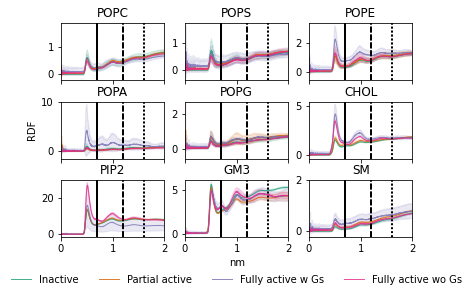

In [15]:
plt.rcParams.update({'font.size':10})
plot_rdf (systems, system_labels)

In [16]:
pwd

'/home/au447022/Documents/GCGR_Complex_LB/LIVER/ALL'

In [14]:
def plot_rdf2 (systems):
    '''For RDF'''
    x_max = 2
    color_list = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']

    fig, ax = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True)

    unique_lipids1 = ['POPC','POPS','POPE']
    unique_lipids2 = ['POPG', 'CHOL','DPSM']

    for idx, l in enumerate(unique_lipids1):
        dir_data = load_rdf(l)

        for ndx, s in enumerate(systems):
            if len(dir_data[s])==0:
                continue
            else:
                data = dir_data[s]
                #print (np.array(data).shape)
                min_shape = np.min([ i.shape[0] for i in data ] ) - 1 
                data_array = np.array([ i[:min_shape,:] for i in data ])
                
                Ava = np.average(data_array, axis=0)
                Std = np.std(data_array, axis=0)
                ax[0,idx].plot(Ava[:,0], Ava[:,1], label=s, color=color_list[ndx], alpha=0.7)
                ax[0,idx].fill_between(Ava[:,0], Ava[:,1]-Std[:,1], Ava[:,1]+Std[:,1], alpha=0.7, edgecolor=color_list[ndx], facecolor=color_list[ndx])
                ax[0,0].set_xlim(0,x_max)
                ax[0,idx].set_title(l)
                ax[0,idx].axvline(x=0.7,ymin=0, ymax=3, color='black', linewidth=1.5)
                ax[0,idx].axvline(x=1.2,ymin=0, ymax=3, color='black', linestyle='--', linewidth=1.5)
                ax[0,idx].axvline(x=1.6,ymin=0, ymax=3, color='black', linestyle=':', linewidth=1.5)
                #ax[0,0].legend(loc='best')

    for idx, l in enumerate(unique_lipids2):
        dir_data = load_rdf(l)
        #print (l)

        for ndx, s in enumerate(systems):
            if len(dir_data[s])==0:
                continue
            else:
                data = dir_data[s]
                #print (np.array(data).shape)
                min_shape = np.min([ i.shape[0] for i in data ] ) - 1 
                data_array = np.array([ i[:min_shape,:] for i in data ])
                
                Ava = np.average(data_array, axis=0)
                Std = np.std(data_array, axis=0)
                ax[1,idx].plot(Ava[:,0], Ava[:,1], label=s, color=color_list[ndx], alpha=0.7)
                #ax[1,idx].plot(Ava[:,0], Ava[:,1], color=color_list[ndx], alpha=0.7)
                ax[1,idx].fill_between(Ava[:,0], Ava[:,1]-Std[:,1], Ava[:,1]+Std[:,1], alpha=0.7, edgecolor=color_list[ndx], facecolor=color_list[ndx])
                ax[1,0].set_xlim(0,x_max)
                ax[1,idx].set_title(l)
                #ax[1,0].legend(loc='best')
                #ax[1,idx].axvline(x=0.4,ymin=0, ymax=3)
                #ax[1,idx].axvline(x=0.4,ymin=0, ymax=3, color='black', linestyle='--')
                ax[1,idx].axvline(x=0.7,ymin=0, ymax=3, color='black', linewidth=1.5)
                ax[1,idx].axvline(x=1.2,ymin=0, ymax=3, color='black', linestyle='--', linewidth=1.5)
                ax[1,idx].axvline(x=1.6,ymin=0, ymax=3, color='black', linestyle=':', linewidth=1.5)

    ax[0,2].legend(loc='center left', bbox_to_anchor=(1, 0.8),
              fancybox=True, shadow=True, ncol=1, frameon=False)

    fig.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=0.37)
    
    plt.savefig('RDFs_2.png', dpi=300, bbox_inches='tight')
    return

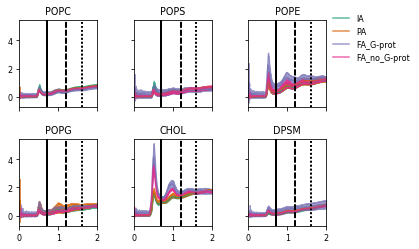

In [15]:
plot_rdf2 (systems)

In [16]:
def plot_rdf3 (systems):
    '''For RDF'''
    x_max = 10
    color_list = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02']

    fig, ax = plt.subplots(nrows=3, ncols=3, sharey=True, sharex=True)

    unique_lipids1 = ['POPC','POPS','POPE']
    unique_lipids2 = ['POPA','POPG', 'CHOL']
    unique_lipids3 = ['PAP6', 'DPGM3', 'DPSM']

    for idx, l in enumerate(unique_lipids1):
        dir_data = load_rdf(l)

        for ndx, s in enumerate(systems):
            if len(dir_data[s])==0:
                continue
            else:
                data = dir_data[s]
                #print (np.array(data).shape)
                min_shape = np.min([ i.shape[0] for i in data ] ) - 1 
                data_array = np.array([ i[:min_shape,:] for i in data ])
                
                Ava = np.average(data_array, axis=0)
                Std = np.std(data_array, axis=0)
                ax[0,idx].plot(Ava[:,0], Ava[:,1], label=s, color=color_list[ndx], alpha=0.7)
                ax[0,idx].fill_between(Ava[:,0], Ava[:,1]-Std[:,1], Ava[:,1]+Std[:,1], alpha=0.7, edgecolor=color_list[ndx], facecolor=color_list[ndx])
                ax[0,0].set_xlim(0,x_max)
                ax[0,idx].set_title(l)


    for idx, l in enumerate(unique_lipids2):
        dir_data = load_rdf(l)
        #print (l)

        for ndx, s in enumerate(systems):
            if len(dir_data[s])==0:
                continue
            else:
                data = dir_data[s]
                #print (np.array(data).shape)
                min_shape = np.min([ i.shape[0] for i in data ] ) - 1 
                data_array = np.array([ i[:min_shape,:] for i in data ])
                
                Ava = np.average(data_array, axis=0)
                Std = np.std(data_array, axis=0)
                ax[1,idx].plot(Ava[:,0], Ava[:,1], label=s, color=color_list[ndx], alpha=0.7)
                #ax[1,idx].plot(Ava[:,0], Ava[:,1], color=color_list[ndx], alpha=0.7)
                ax[1,idx].fill_between(Ava[:,0], Ava[:,1]-Std[:,1], Ava[:,1]+Std[:,1], alpha=0.7, edgecolor=color_list[ndx], facecolor=color_list[ndx])
                ax[1,0].set_xlim(0,x_max)
                ax[1,idx].set_title(l)

    for idx, l in enumerate(unique_lipids3):
        dir_data = load_rdf(l)
        #print (l)

        for ndx, s in enumerate(systems):
            if len(dir_data[s])==0:
                continue
            else:
                data = dir_data[s]
                #print (np.array(data).shape)
                min_shape = np.min([ i.shape[0] for i in data ] ) - 1 
                data_array = np.array([ i[:min_shape,:] for i in data ])
                
                Ava = np.average(data_array, axis=0)
                Std = np.std(data_array, axis=0)
                ax[2,idx].plot(Ava[:,0], Ava[:,1], label=s, color=color_list[ndx], alpha=0.7)
                #ax[2,idx].plot(Ava[:,0], Ava[:,1], color=color_list[ndx], alpha=0.7)
                ax[2,idx].fill_between(Ava[:,0], Ava[:,1]-Std[:,1], Ava[:,1]+Std[:,1], alpha=0.7, edgecolor=color_list[ndx], facecolor=color_list[ndx])
                ax[2,0].set_xlim(0,x_max)
                ax[2,idx].set_title(l)

                
    ax[0,2].legend(loc='center left', bbox_to_anchor=(1, 0.8),
              fancybox=True, shadow=True, ncol=1, frameon=False)

    fig.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=0.37)
    
    plt.savefig('RDFs_3.png', dpi=300, bbox_inches='tight')
    return

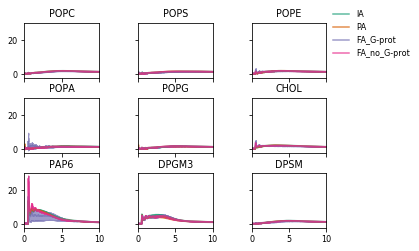

In [17]:
plot_rdf3 (systems)